In [ ]:
from IPython.display import Image

# seaborn
##### matplotlib기반 통계 데이터 시각화에 최적화된 라이브러리
##### 실제 분석에서는 matplotlib과 seaborn을 함께 사용

In [ ]:
Image("C:/Users/user/Desktop/caba_2015_필기/day24/seaborn.JPG")

In [ ]:
#추가
# sns.heatmap(data,)
# sns.countplot: 빈도를 볼 때

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# figsize 한 번에 세팅, 가로 10, 세로 6으로 세팅
plt.rc('figure', figsize=(10,6))

In [ ]:
tips = pd.read_csv('C:/caba2012/workspace/Caba_시각화/dataset/examples/tips.csv')

In [ ]:
tips.head()

In [ ]:
party_counts = pd.crosstab(tips['day'], tips['size'])

#size 2 ~ 5 선택
party_counts = party_counts.loc[:, 2:5]

# 각 열을 합계 1로 정규화
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

In [ ]:
# 요일별 팁의 비중을 시각화
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.head())
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")

In [ ]:
tips.time.value_counts()

In [ ]:
#Hue: x,y 2가지 변수를 입력받아 2차원 형태의 그래프가 그려질 때, 한가지 차원을 더 추가할 수 있다.
# sns.barplot(x='tip_pct',y='day',hue='time',data=tips, orient='h')
sns.barplot(x='tip_pct',y='day',hue='smoker',data=tips, orient='h')

In [ ]:
sns.barplot(x='tip_pct',y='day', data=tips, orient='h')

In [ ]:
# sns.countplot()
# countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.
import warnings
warnings.filterwarnings('ignore')
#size 변수의 빈도를 보고 싶을 때, hue를 이용하여 time 변수 추가.
# sns.countplot('size', hue='day', data=tips, palette='bone')
sns.countplot('size', hue='time', data=tips, palette='bone')

In [ ]:
tips['tip_pct'].plot.hist(bins=50)

In [ ]:
tips.tip_pct.plot.density()

In [ ]:
# comp1: 평균 0, 표준편차 1인 '실수'(난수:random number) 200개 생성
# comp2: 평균 10, 표준편차 2인 '실수'(난수:random number) 200개 생성
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
values.describe()

In [ ]:
sns.distplot(values, bins=100, color='k')

In [ ]:
# 물고기 종류별 몸길이 데이터
fish_multi = pd.read_csv("C:/caba2012/workspace/Caba_시각화/dataset/4_fm2.csv")

In [ ]:
fish_multi

In [ ]:
# 종류별 몸길이 데이터 추출
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']
sns.distplot(length_a,color='gray')

In [ ]:
sns.distplot(length_a, bins=5,color='gray',kde=False)

In [ ]:
# 종류별 몸길이 데이터 추출
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']


sns.distplot(length_a, color='gray')

In [ ]:
# distplot에서 hist만 나타내고 싶을 때
sns.distplot(length_a, bins=5, color='gray', kde=False)

In [ ]:
sns.boxplot(x='species', y='length', data=fish_multi, color='skyblue')

In [ ]:
# 바이올린 플롯
# 밀도를 옆으로 보여줌
# 상자그림의 상자 대신 커널밀도추정의 결과를 사용
sns.violinplot(x='species', y='length', data=fish_multi, color='skyblue')

In [ ]:
fish_multi = pd.read_csv("C:/caba2012/workspace/Caba_시각화/dataset/4_fm2.csv")

In [ ]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
print(fish_multi)

In [ ]:
sns.boxplot(x = "species", y  = "length", data = fish_multi, color = 'gray')

In [ ]:
# 다른방법
# Q. fish_multi에서 이상치를 제거한 후 바이올린 플롯을 표현하세요.

In [ ]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
print(fish_multi)
fish_multi.shape

In [ ]:
# 0~20은 인덱스를 내가 매긴게 아니고, 순서를 나타내는 기본 넘버
# https://zephyrus1111.tistory.com/64
# 인덱스 쉽게 제거하는 방법
fm1 = fish_multi.drop([5,10])
fm1

In [ ]:
sns.violinplot(x='species',y='length',
              data = fm1, color= 'red')

In [ ]:
# Q. fish_multi에서 이상치를 제거한 후 바이올린 플롯을 표현하세요.

In [ ]:
fm1 = fish_multi[fish_multi.species=='A']['length']
fm2 = fish_multi[fish_multi.species=='B']['length']

print(fm1.describe())
print(fm2.describe())
iqr = 5 - 2
uw_check = 5 + 1.5*iqr
print(uw_check)
st = np.sort(fm1)[::-1] #내림차순
print('이상치: {}'.format(st[st>uw_check]))
print()
iqr = 7.75 - 6.25
lw_check = 6.25-1.5*iqr
print(lw_check)
st = np.sort(fm2) #오름차순
print('이상치: {}'.format(st[st<lw_check]))

In [ ]:
st = np.sort(fm1)[::-1]
st

In [ ]:
st1 = np.sort(fm2)
st1

In [ ]:
index_fm = fish_multi[((fish_multi.length==10) & (fish_multi.species =='A')) | \
                      ((fish_multi.length==2) & (fish_multi.species =='B'))].index

In [ ]:
fm2 = fish_multi.drop(index_fm)
fm2
sns.violinplot(x='species',y='length',
              data = fm2, color= 'skyblue')

In [ ]:
cov_data = pd.read_csv('C:/caba2012/workspace/Caba_시각화/dataset/4_cov.csv')

In [ ]:
cov_data

# 다차원 데이터¶
데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우가 있을 수 있다.

1.분석하고자 하는 데이터가 모두 실수 값인 경우
2.분석하고자 하는 데이터가 모두 카테고리 값인 경우
3.분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우

https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html#id4

In [ ]:
# fig = plt.figure(figsize=(3,2))
sns.jointplot(cov_data.x, cov_data.y, kind='reg')
#              joint_kws={'color':'blue'},
#              marginal_kws={'color':'red'})

In [ ]:
df_auto = pd.read_excel('C:/caba2012/workspace/Caba_시각화/dataset/auto-mpg.xlsx')

In [ ]:
df_auto.head()

In [ ]:
#lmplot: 각 데이터셋의 분포와 회귀선을 시각화해줌
#linear model
sns.lmplot(x='mpg', y='weight', data=df_auto, scatter_kws={'color':'skyblue'}, 
           line_kws={'color': 'green'})

In [ ]:
# regplot: scatter plot(분포)과 line plot을 함께 볼 수 있는 데이터 시각화 방법입니다.
sns.regplot(x='mpg', y='weight', data=df_auto, fit_reg=True)

In [ ]:
# 그래프가 너무 작은데, 크게 보는 법?
fig = plt.figure(figsize=(10,6))
sns.pairplot(df_auto, palette='gray')

In [ ]:
t_df = sns.load_dataset('titanic')
t_df.columns

In [ ]:
t_df[['pclass','age','fare','survived']].corr()
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

In [ ]:
sns.heatmap(t_df[['pclass', 'age', 'fare', 'survived']], annot=True)
plt.title('Heatmap of the Dataset', fontsize=30)

In [ ]:
table = t_df.pivot_table(index=['sex'], columns=['class'], values=['survived'],
                         aggfunc = 'mean')

table

In [ ]:
sns.heatmap(table, annot=True, fmt='f', cmap='YlGnBu', linewidth=.5, cbar=True)

In [ ]:
fish_data = np.array([5,7,9,1,5,6,6,2,4,4,5,6,7,3,8,10])

In [ ]:
fish_data

In [ ]:
# Q. fish_data로 다음을 수행하세요.
- 히스토그램을 표현하세요
- 밀도 그래프를 표현하세요
- 히스토그램과 커널밀도함수를 그래프로 같이 표현하세요.

In [ ]:
plt.hist(fish_data)

In [ ]:
fish_data = np.array([ 5, 7, 9,1,5, 6, 6, 2,  4,  4,  5,  6,  7,  3,  8, 10])
df = pd.DataFrame(fish_data)
df.plot(kind='hist')

In [ ]:
df.plot.density()

In [ ]:
sns.distplot(fish_data, bins=10, color='blue',kde=True)

In [ ]:
#버전문제인가
sns.histplot(fish_data,color='blue',kde=True)

In [ ]:
# Q. subplot 사용 밀도있는 그래프와 없는 그래프를 같이 표현하세요.

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.distplot(fish_data, color='blue', kde=False, ax=ax1)
sns.distplot(fish_data, color='blue', kde=True, ax=ax2)

In [ ]:
# Q.'dataset/4_fm2.csv'를 데이터프레임으로 불러와서 아래와 같이 Box Plot을 표현하세요.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('C:/caba2012/workspace/Caba_시각화/dataset/4_fm2.csv')

In [ ]:
df

In [ ]:
df_f = pd.read_csv('C:/caba2012/workspace/Caba_시각화/dataset/4_fm2.csv')

In [ ]:
# 한글 폰트 오류 확인
# from matplotlib import font_manager, rc
# font_path = "dataset/malgun.ttf"
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font_name)

In [ ]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = 'dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.boxplot(x=[df_f[df_f['species']=='A']['length'],
               df_f[df_f['species']=='B']['length']])
ax2.boxplot(x=[df_f[df_f['species']=='A']['length'],
               df_f[df_f['species']=='B']['length']],vert=False)
ax1.set_title('Species별 length 분포(수직 박스 플롯)')
ax2.set_title('Species별 length 분포(수평 박스 플롯)')

In [ ]:
data = pd.read_csv('C:/caba2012/workspace/Caba_시각화/dataset/FIFA.csv', encoding='cp949')

In [ ]:
data.head()

In [ ]:
# Q. 'Preferred Foot'의 빈도를 표시하는 막대 그래프를 표현하세요.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
data.columns
data['Preferred_Foot'].value_counts()
sns.countplot(data['Preferred_Foot'],palette='pink')
plt.title('Most Preferred Foot of the Players', fontsize=20)

In [ ]:
# sns.barplot(x="day", y="total_bill", data=tips)
# plt.title("요일 별, 전체 팁")
# plt.show()

In [ ]:
data['Preferred_Foot'].value_counts()

In [ ]:
# 왜 barplot으로 안그려지지..?
sns.barplot(x='Preferred_Foot', y=data.index ,data=data)

In [ ]:
# Different position in Football
data.Position.value_counts()
plt.figure(figsize=(18,8))

#countplot
ax = sns.countplot('Position', data=data, palette ='bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)

ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)

In [ ]:
# Q. weight 칼럼의 값들에서 닥위를 삭제하고 숫자만 추출

In [ ]:
# 사용자 정의 함수?
# 사용자가 만든 함수

In [ ]:
# csv로 읽어오신 경우
def add_value_to(value):
    out = str(value)+'lbs'
    return out

data.Weight_lb = data.Weight_lb.apply(lambda x: add_value_to(x))
data.Weight_lb.head()

In [ ]:
#lbs제거
def extract_value_from(value):
    out = value.replace('lbs','')
    return float(out)
data.Weight_lb = data.Weight_lb.apply(lambda x:  extract_value_from(x))
data.Weight_lb.head()

In [ ]:
data.Weight_lb.unique()

In [ ]:
# 번외문제
# Q. Weight 칼럼의 값들에서 무게 단위인 'lbs'를 삭제하고 소수점 둘째자리의 숫자로 변환하세요.

In [ ]:
format = lambda x: '%.2f' %x

In [ ]:
data.Weight_lb.apply(format)

In [ ]:
# Q. Wage 칼럼의 값을 아래와 같이 변환하세요.
# €565K -> 565000.0

## 0120 시작

In [5]:
df = pd.read_csv('C:/caba2012/workspace/Caba_visualization/dataset/data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
# row를 제거할때, axis = 0 설정
# column을 제거할때, axis = 1 설정, axis=1을 설정해줘야 error가 안뜬다
# default는 axis = 0
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
def extract_value_from(a,b):
    return b - a

df['OP'] = df.apply(lambda x:extract_value_from(x['Overall'],x['Potential']),axis=1)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,OP
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,1
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,2
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,1


In [12]:
df.Wage.value_counts()

€1K      4900
€2K      2827
€3K      1857
€4K      1255
€5K       869
         ... 
€380K       1
€93K        1
€265K       1
€300K       1
€200K       1
Name: Wage, Length: 144, dtype: int64

In [ ]:
# 오름차순: 1,2,3,4 (ascending=True)
# 내림차순: 4,3,2,1 (ascending=False)

In [ ]:
# DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, 
#                  kind='quicksort', na_position='last', ignore_index=False, key=None)

In [8]:
# Top20 players by potential
# potential 내림차순으로 
# ['Name', 'Age', 'Value', 'Overall', 'Potential'] columns을 추출하여 데이터프레임 생성
ply = df.sort_values(by ='Potential', ascending=False)[['Name', 'Age', 'Value', 'Overall', 
                                                   'Potential']]

In [10]:
ply.head(10)

,Name,Age,Value,Overall,Potential
25,K. Mbappé,19,€81M,88,95
0,L. Messi,31,€110.5M,94,94
15,P. Dybala,24,€89M,89,94
1,Cristiano Ronaldo,33,€77M,94,94
2,Neymar Jr,26,€118.5M,92,93
3,De Gea,27,€72M,91,93
9,J. Oblak,25,€68M,90,93
229,G. Donnarumma,19,€29M,82,93
1143,Vinícius Júnior,17,€17.5M,77,92
155,O. Dembélé,21,€40M,83,92


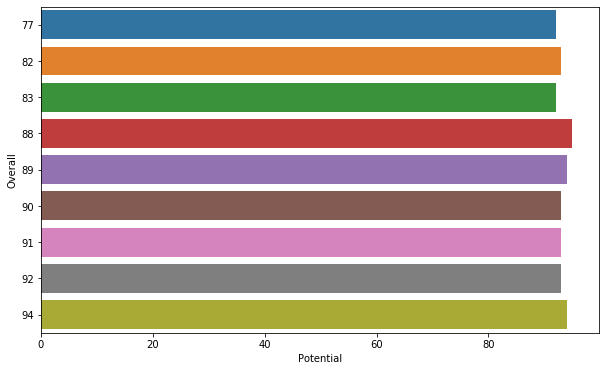

In [14]:
# 그래프가 잘 표현되도록 orient설정을 잘해줘야 한다.
# 이 두가지 변수로는 v(수직)은 적합하지 않다.
sns.barplot(x='Potential', y='Overall', data=ply.head(10), orient='h')

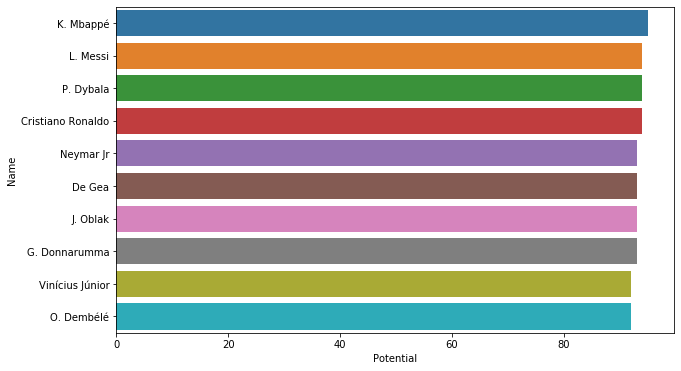

In [11]:
sns.barplot(x='Potential', y='Name', data=ply.head(10), orient='h')

In [ ]:
# Q. €110.5M -> 110500000.0 로 변환 후 Value 칼럼의 분포를 그래프로 표현하세요

In [13]:
def extract_value_from(Value):
    out = Value.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000
    return float(out)

df.Value = df.Value.apply(lambda x: extract_value_from(x))
df.Value.head()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

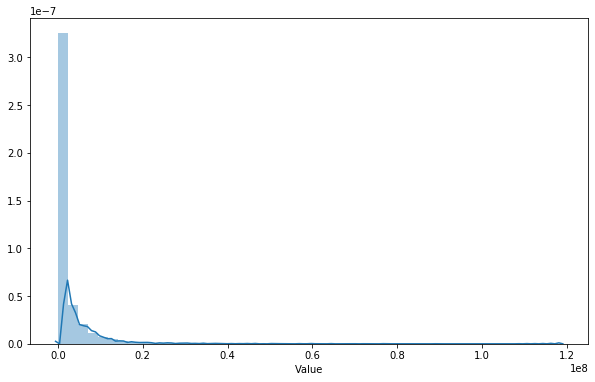

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(df.Value,kde=True)

In [23]:
# the average value for every age in the dataset
age = df.groupby('Age')['Value'].mean().reset_index()
age.head()

,Age,Value
0,16,192857.142857
1,17,222121.107266
2,18,248762.295082
3,19,295129.882812
4,20,289866.935484


In [18]:
age0 = df.groupby('Age')['Value']
age0

In [16]:
age1 = df.groupby('Age')['Value'].size()
age1

Age
16      42
17     289
18     732
19    1024
20    1240
21    1423
22    1340
23    1332
24    1358
25    1319
26    1387
27    1162
28    1101
29     959
30     917
31     707
32     574
33     408
34     404
35     196
36     127
37      82
38      37
39      25
40      13
41       5
42       1
44       2
45       1
Name: Value, dtype: int64

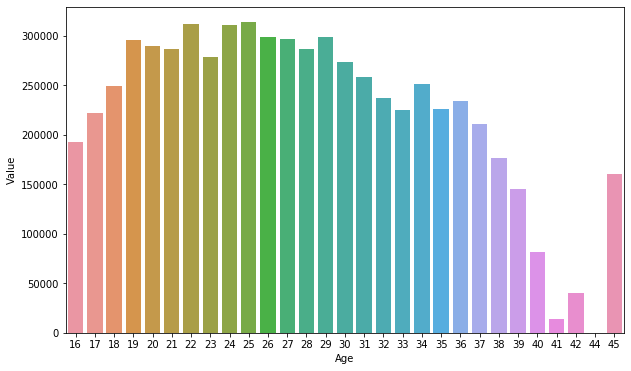

In [24]:
# 원하는 데이터로 전처리한 후, 그래프를 이용하여 시각화
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='Value',data=age, orient='v')

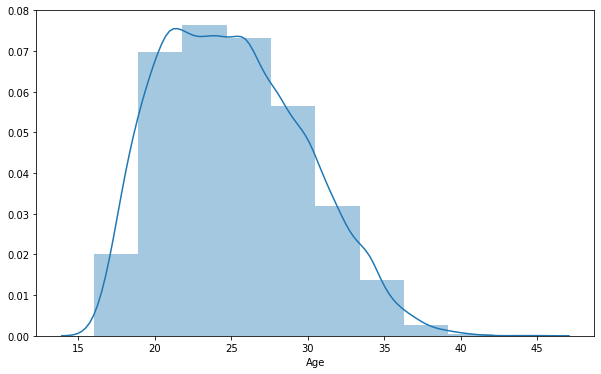

In [19]:
# age의 분포 및 밀도그래프
# kde값은 True가 default값
sns.distplot(df.Age, bins=10)

In [25]:
# Top 30 teams with highest player's average value
team_30 = df.sort_values('Club', ascending=False)[['Club', 'Age', 'Value', 'Overall', 
                                                    'Potential']].head(30)

In [26]:
lub = df.groupby('Club')['Value'].mean().reset_index().sort_values('Value', 
                                                                   ascending=False).head(10)

In [24]:
lub.head(3)

,Club,Value
326,Juventus,2.817900e+07
470,Real Madrid,2.649773e+07
212,FC Barcelona,2.583636e+07


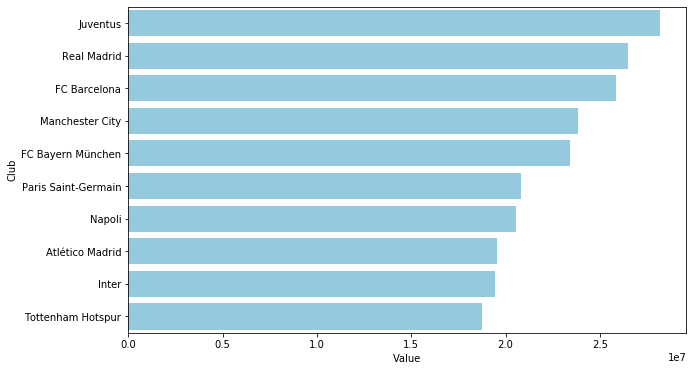

In [27]:
sns.barplot(x='Value',y='Club',data=lub,color='skyblue',orient='h')

In [ ]:
# Q. Club Data를 출력하는 사용자 함수를 만든 후 "맨체스터" 데이터 출력
# 출력칼럼
# 'Name', 'Jersey Number', 'Position', 'Overall','Nationality'
# 'Age', 'Wage', 'Value', 'Contract Valid Until'

In [28]:
def club(x):
    return df[df['Club']==x][['Name','Jersey Number', 'Position','Overall',\
                               'Nationality','Age','Wage','Value','Contract Valid Until']]
mu = club("Manchester United")
mu.head()

,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
3,De Gea,1.0,GK,91,Spain,27,€260K,72000000.0,2020
45,P. Pogba,6.0,RDM,87,France,25,€210K,64000000.0,2021
47,R. Lukaku,9.0,ST,87,Belgium,25,€230K,62500000.0,2022
93,A. Sánchez,7.0,RW,85,Chile,29,€215K,37500000.0,2022
116,A. Martial,11.0,LW,84,France,22,€165K,42500000.0,2019


In [ ]:
# input함수로 club이름을 받아서, 출력할 수는 없나?

In [7]:
a = input()

def Club_output(a):
   return df[df['Club'] == a][['Name', 'Jersey Number', 'Position', 'Overall','Nationality', 'Age', 'Wage', 'Value', 'Contract Valid Until']]

Manchester United
